# Import

In [3]:
import pandas as pd
import os
from os.path import join
from datetime import datetime, timezone, timedelta
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import logging
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
from yforseer.networks import StockNet
from yforseer.datasets import StockDataset
from yforseer.trainers import StockNetTrainer
import mlflow
from tqdm import tqdm

from yforseer.scraping import RawDF_Schema

# Dataset and loader

In [5]:

# Load dataset
load_array_pth = 'data/yahoo/artifacts/data_array.npz'
data = torch.from_numpy(np.load(load_array_pth)['data']).to(torch.float32)
num_days = data.shape[1]
test_size = int(0.1 * num_days)
train_size = num_days - test_size
train_data = data[:, :train_size]
test_data = data[:, train_size:]
train_dataset = StockDataset(data = train_data, memory=60, lookahead=30, mode='last')
test_dataset = StockDataset(data = test_data, memory=60, lookahead=30, mode='last')
print('train_dataset:', len(train_dataset))
print('test_dataset:', len(test_dataset))


train_dataset: 5289
test_dataset: 508


# Single trace

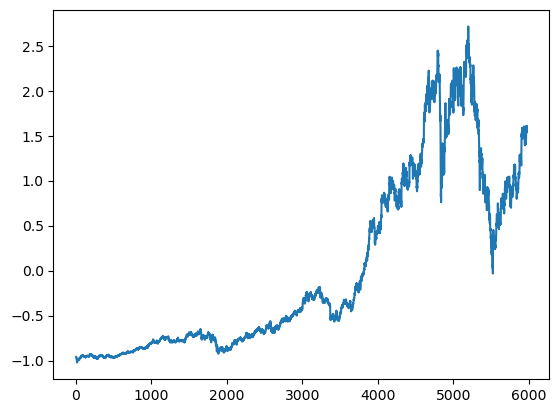

In [11]:
plt.plot(data[1])